In [1]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split,cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,LabelEncoder
import os
import seaborn as sns
import matplotlib.pyplot as plt 
import sys
import joblib
import warnings
warnings.simplefilter(action='ignore')

In [2]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import tensorflow as tf
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.feature_selection import mutual_info_classif
from yellowbrick.model_selection import RFECV
from sklearn.datasets import make_classification
from imblearn.combine import SMOTETomek
from collections import Counter
from sklearn.metrics import confusion_matrix,classification_report

In [3]:
df_train = pd.read_csv("SalaryData_Train(1).csv")

In [4]:
df_test = pd.read_csv("SalaryData_Test(1).csv")

In [5]:
df_train.head()

age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            13   United-States   <=50K  
2            0            40   United-States   <=50K  
3            0            40   United-States   <=50K  
4            0            40            Cuba   <=50K

In [6]:
df_test.head()

age   workclass      education  educationno        maritalstatus  \
0   25     Private           11th            7        Never-married   
1   38     Private        HS-grad            9   Married-civ-spouse   
2   28   Local-gov     Assoc-acdm           12   Married-civ-spouse   
3   44     Private   Some-college           10   Married-civ-spouse   
4   34     Private           10th            6        Never-married   

           occupation    relationship    race    sex  capitalgain  \
0   Machine-op-inspct       Own-child   Black   Male            0   
1     Farming-fishing         Husband   White   Male            0   
2     Protective-serv         Husband   White   Male            0   
3   Machine-op-inspct         Husband   Black   Male         7688   
4       Other-service   Not-in-family   White   Male            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            50   United-States   <=50K  
2            0            40   United-States    >50K  
3            0            40   United-States    >50K  
4            0            30   United-States   <=50K

# Exploratory Data Analysis (EDA)

In [7]:
#merging our train and test data 
df = df_train.append(df_test)
df.reset_index(inplace=True,drop=True)
df

age          workclass   education  educationno        maritalstatus  \
0       39          State-gov   Bachelors           13        Never-married   
1       50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2       38            Private     HS-grad            9             Divorced   
3       53            Private        11th            7   Married-civ-spouse   
4       28            Private   Bachelors           13   Married-civ-spouse   
...    ...                ...         ...          ...                  ...   
45216   33            Private   Bachelors           13        Never-married   
45217   39            Private   Bachelors           13             Divorced   
45218   38            Private   Bachelors           13   Married-civ-spouse   
45219   44            Private   Bachelors           13             Divorced   
45220   35       Self-emp-inc   Bachelors           13   Married-civ-spouse   

               occupation    relationship                 race      sex  \
0            Adm-clerical   Not-in-family                White     Male   
1         Exec-managerial         Husband                White     Male   
2       Handlers-cleaners   Not-in-family                White     Male   
3       Handlers-cleaners         Husband                Black     Male   
4          Prof-specialty            Wife                Black   Female   
...                   ...             ...                  ...      ...   
45216      Prof-specialty       Own-child                White     Male   
45217      Prof-specialty   Not-in-family                White   Female   
45218      Prof-specialty         Husband                White     Male   
45219        Adm-clerical       Own-child   Asian-Pac-Islander     Male   
45220     Exec-managerial         Husband                White     Male   

       capitalgain  capitalloss  hoursperweek          native  Salary  
0             2174            0            40   United-States   <=50K  
1                0            0            13   United-States   <=50K  
2                0            0            40   United-States   <=50K  
3                0            0            40   United-States   <=50K  
4                0            0            40            Cuba   <=50K  
...            ...          ...           ...             ...     ...  
45216            0            0            40   United-States   <=50K  
45217            0            0            36   United-States   <=50K  
45218            0            0            50   United-States   <=50K  
45219         5455            0            40   United-States   <=50K  
45220            0            0            60   United-States    >50K  

[45221 rows x 14 columns]

In [8]:
df.shape

(45221, 14)

In [9]:
df.info

<bound method DataFrame.info of        age          workclass   education  educationno        maritalstatus  \
0       39          State-gov   Bachelors           13        Never-married   
1       50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2       38            Private     HS-grad            9             Divorced   
3       53            Private        11th            7   Married-civ-spouse   
4       28            Private   Bachelors           13   Married-civ-spouse   
...    ...                ...         ...          ...                  ...   
45216   33            Private   Bachelors           13        Never-married   
45217   39            Private   Bachelors           13             Divorced   
45218   38            Private   Bachelors           13   Married-civ-spouse   
45219   44            Private   Bachelors           13             Divorced   
45220   35       Self-emp-inc   Bachelors           13   Married-civ-spouse   

               occu

In [10]:
df.describe()

age   educationno   capitalgain   capitalloss  hoursperweek
count  45221.000000  45221.000000  45221.000000  45221.000000  45221.000000
mean      38.548086     10.118463   1101.454700     88.548617     40.938038
std       13.217981      2.552909   7506.511295    404.838249     12.007640
min       17.000000      1.000000      0.000000      0.000000      1.000000
25%       28.000000      9.000000      0.000000      0.000000     40.000000
50%       37.000000     10.000000      0.000000      0.000000     40.000000
75%       47.000000     13.000000      0.000000      0.000000     45.000000
max       90.000000     16.000000  99999.000000   4356.000000     99.000000

In [11]:
df.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [12]:
df[df.duplicated()]

age workclass      education  educationno        maritalstatus  \
326     33   Private      Bachelors           13   Married-civ-spouse   
364     27   Private      Bachelors           13        Never-married   
518     24   Private        HS-grad            9        Never-married   
525     24   Private        HS-grad            9        Never-married   
619     33   Private      Bachelors           13   Married-civ-spouse   
...    ...       ...            ...          ...                  ...   
45205   22   Private   Some-college           10        Never-married   
45210   32   Private        HS-grad            9   Married-civ-spouse   
45213   31   Private        HS-grad            9   Married-civ-spouse   
45214   25   Private        HS-grad            9        Never-married   
45218   38   Private      Bachelors           13   Married-civ-spouse   

               occupation    relationship    race      sex  capitalgain  \
326       Exec-managerial         Husband   White     Male            0   
364          Craft-repair   Not-in-family   White     Male            0   
518     Handlers-cleaners       Unmarried   Black   Female            0   
525          Craft-repair       Own-child   White     Male            0   
619       Exec-managerial         Husband   White     Male            0   
...                   ...             ...     ...      ...          ...   
45205        Craft-repair       Own-child   White     Male            0   
45210   Handlers-cleaners         Husband   White     Male            0   
45213        Craft-repair         Husband   White     Male            0   
45214       Other-service       Own-child   White   Female            0   
45218      Prof-specialty         Husband   White     Male            0   

       capitalloss  hoursperweek          native  Salary  
326              0            40   United-States    >50K  
364              0            50   United-States   <=50K  
518              0            40   United-States   <=50K  
525              0            40   United-States   <=50K  
619              0            40   United-States    >50K  
...            ...           ...             ...     ...  
45205            0            40   United-States   <=50K  
45210            0            40   United-States   <=50K  
45213            0            40   United-States   <=50K  
45214            0            40   United-States   <=50K  
45218            0            50   United-States   <=50K  

[5982 rows x 14 columns]

In [13]:
df[df.duplicated()].shape

(5982, 14)

In [14]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
45216    False
45217    False
45218     True
45219    False
45220    False
Length: 45221, dtype: bool

In [15]:
df = df.drop_duplicates()

In [16]:
df.shape

(39239, 14)

In [17]:
df.head()

age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            13   United-States   <=50K  
2            0            40   United-States   <=50K  
3            0            40   United-States   <=50K  
4            0            40            Cuba   <=50K

In [20]:
df1 = df.copy()
cols = ['workclass','education','maritalstatus','occupation','relationship',
      'race','sex','native','Salary']
df1[cols] = df[cols].apply(LabelEncoder().fit_transform)

df1.head()

age  workclass  education  educationno  maritalstatus  occupation  \
0   39          5          9           13              4           0   
1   50          4          9           13              2           3   
2   38          2         11            9              0           5   
3   53          2          1            7              2           5   
4   28          2          9           13              2           9   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  \
0             1     4    1         2174            0            40      37   
1             0     4    1            0            0            13      37   
2             1     4    1            0            0            40      37   
3             0     2    1            0            0            40      37   
4             5     2    0            0            0            40       4   

   Salary  
0       0  
1       0  
2       0  
3       0  
4       0

# Visualizations

age


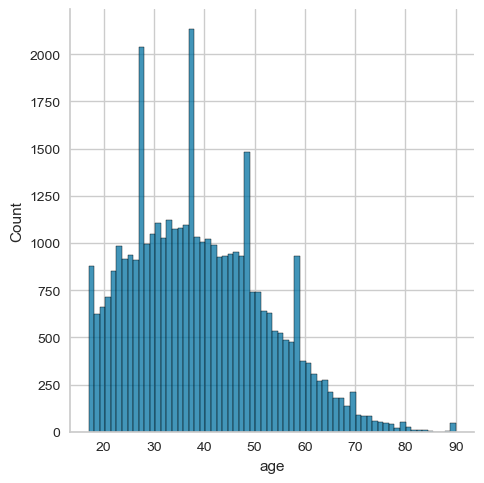

<Figure size 2000x1000 with 0 Axes>

workclass


<Figure size 2000x1000 with 0 Axes>

education


<Figure size 2000x1000 with 0 Axes>

educationno


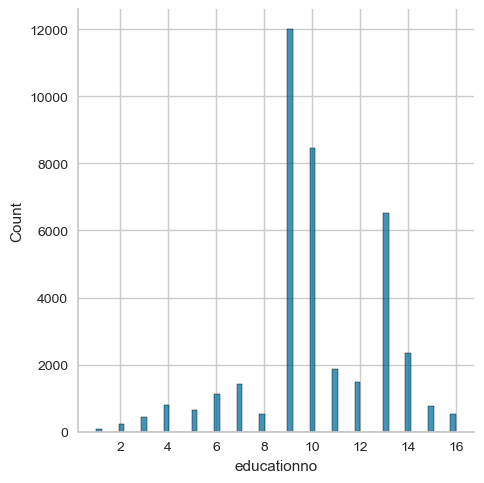

<Figure size 2000x1000 with 0 Axes>

maritalstatus


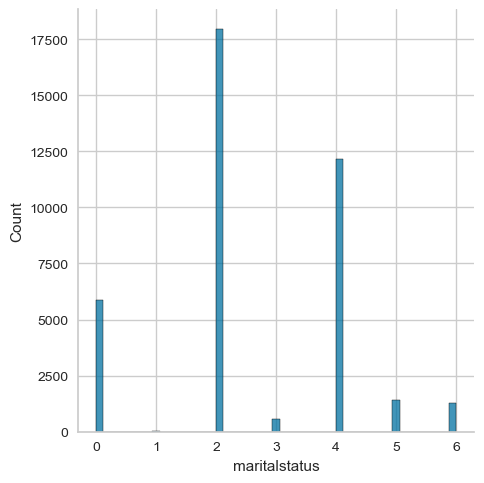

<Figure size 2000x1000 with 0 Axes>

occupation


<Figure size 2000x1000 with 0 Axes>

relationship


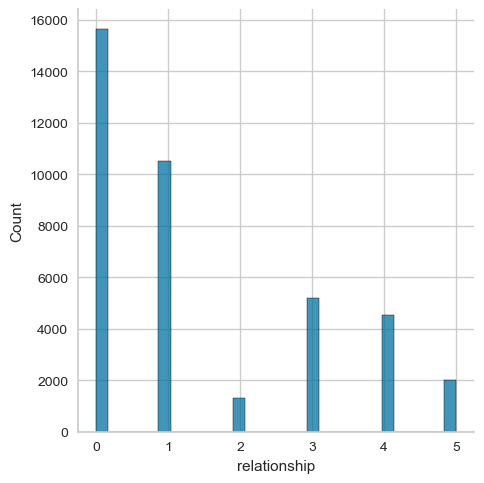

<Figure size 2000x1000 with 0 Axes>

race


<Figure size 2000x1000 with 0 Axes>

sex


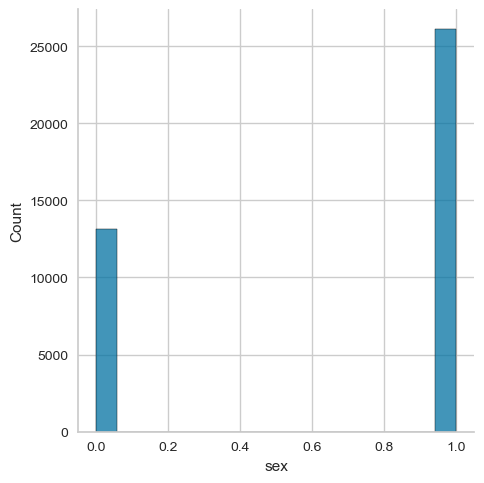

<Figure size 2000x1000 with 0 Axes>

capitalgain


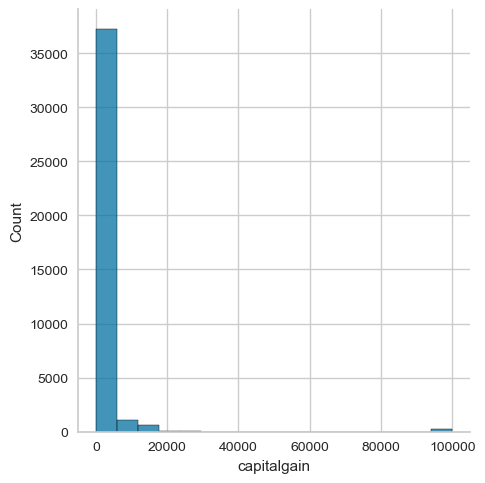

<Figure size 2000x1000 with 0 Axes>

capitalloss


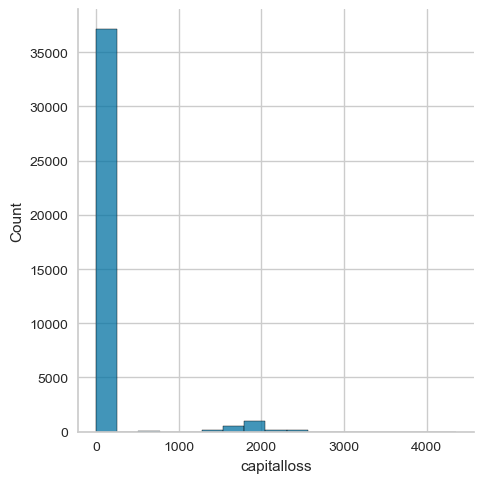

<Figure size 2000x1000 with 0 Axes>

hoursperweek


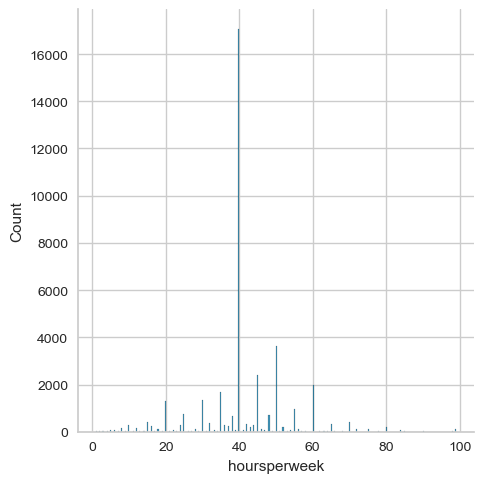

<Figure size 2000x1000 with 0 Axes>

native


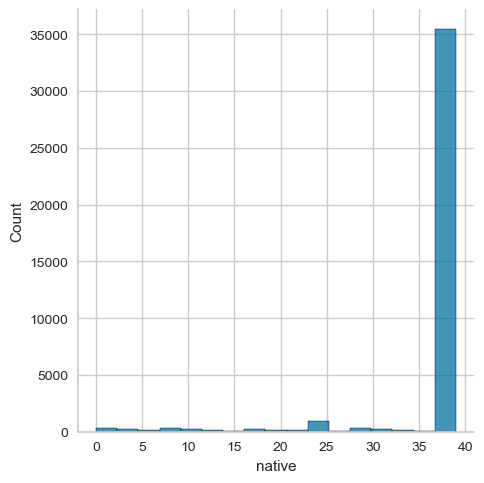

<Figure size 2000x1000 with 0 Axes>

Salary


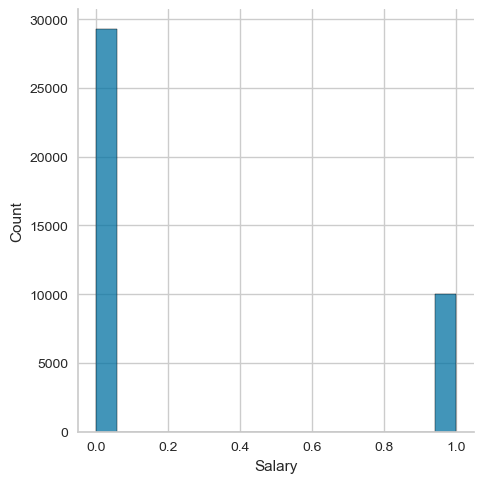

<Figure size 2000x1000 with 0 Axes>

In [21]:
# Displot
for n in df1.columns:
    print(n)
    sns.displot(df1[n])
    plt.figure(figsize=(20,10))
    plt.show()

In [22]:
# Boxplot
plt.figure(figsize=(20,7))
sns.boxplot(data = df1)

<AxesSubplot:>

In [23]:
df1.corr()

age  workclass  education  educationno  maritalstatus  \
age            1.000000   0.079642   0.001807     0.030211      -0.233279   
workclass      0.079642   1.000000   0.022333     0.041859      -0.031786   
education      0.001807   0.022333   1.000000     0.366443      -0.043411   
educationno    0.030211   0.041859   0.366443     1.000000      -0.069475   
maritalstatus -0.233279  -0.031786  -0.043411    -0.069475       1.000000   
occupation    -0.004676   0.016217  -0.020636     0.087334       0.006666   
relationship  -0.230643  -0.070247  -0.010764    -0.085939       0.155762   
race           0.044616   0.059339   0.003913     0.033594      -0.075430   
sex            0.068483   0.075331  -0.029864     0.006596      -0.109154   
capitalgain    0.075495   0.031985   0.035072     0.129552      -0.042309   
capitalloss    0.049876   0.002649   0.024082     0.082594      -0.033607   
hoursperweek   0.066927   0.047542   0.060431     0.136030      -0.167011   
native         0.012129   0.010469   0.075014     0.097527      -0.026461   
Salary         0.214285   0.015598   0.094952     0.329569      -0.181626   

               occupation  relationship      race       sex  capitalgain  \
age             -0.004676     -0.230643  0.044616  0.068483     0.075495   
workclass        0.016217     -0.070247  0.059339  0.075331     0.031985   
education       -0.020636     -0.010764  0.003913 -0.029864     0.035072   
educationno      0.087334     -0.085939  0.033594  0.006596     0.129552   
maritalstatus    0.006666      0.155762 -0.075430 -0.109154    -0.042309   
occupation       1.000000     -0.061367  0.008746  0.061054     0.016952   
relationship    -0.061367      1.000000 -0.113604 -0.584810    -0.062712   
race             0.008746     -0.113604  1.000000  0.085235     0.021099   
sex              0.061054     -0.584810  0.085235  1.000000     0.052882   
capitalgain      0.016952     -0.062712  0.021099  0.052882     1.000000   
capitalloss      0.010978     -0.066390  0.031794  0.053687    -0.036791   
hoursperweek     0.020983     -0.247737  0.053968  0.226747     0.082977   
native           0.004230     -0.001036  0.116142 -0.010639     0.012924   
Salary           0.049738     -0.244911  0.078779  0.212912     0.231529   

               capitalloss  hoursperweek    native    Salary  
age               0.049876      0.066927  0.012129  0.214285  
workclass         0.002649      0.047542  0.010469  0.015598  
education         0.024082      0.060431  0.075014  0.094952  
educationno       0.082594      0.136030  0.097527  0.329569  
maritalstatus    -0.033607     -0.167011 -0.026461 -0.181626  
occupation        0.010978      0.020983  0.004230  0.049738  
relationship     -0.066390     -0.247737 -0.001036 -0.244911  
race              0.031794      0.053968  0.116142  0.078779  
sex               0.053687      0.226747 -0.010639  0.212912  
capitalgain      -0.036791      0.082977  0.012924  0.231529  
capitalloss       1.000000      0.050638  0.014576  0.153263  
hoursperweek      0.050638      1.000000  0.013993  0.221424  
native            0.014576      0.013993  1.000000  0.025050  
Salary            0.153263      0.221424  0.025050  1.000000

<AxesSubplot:>

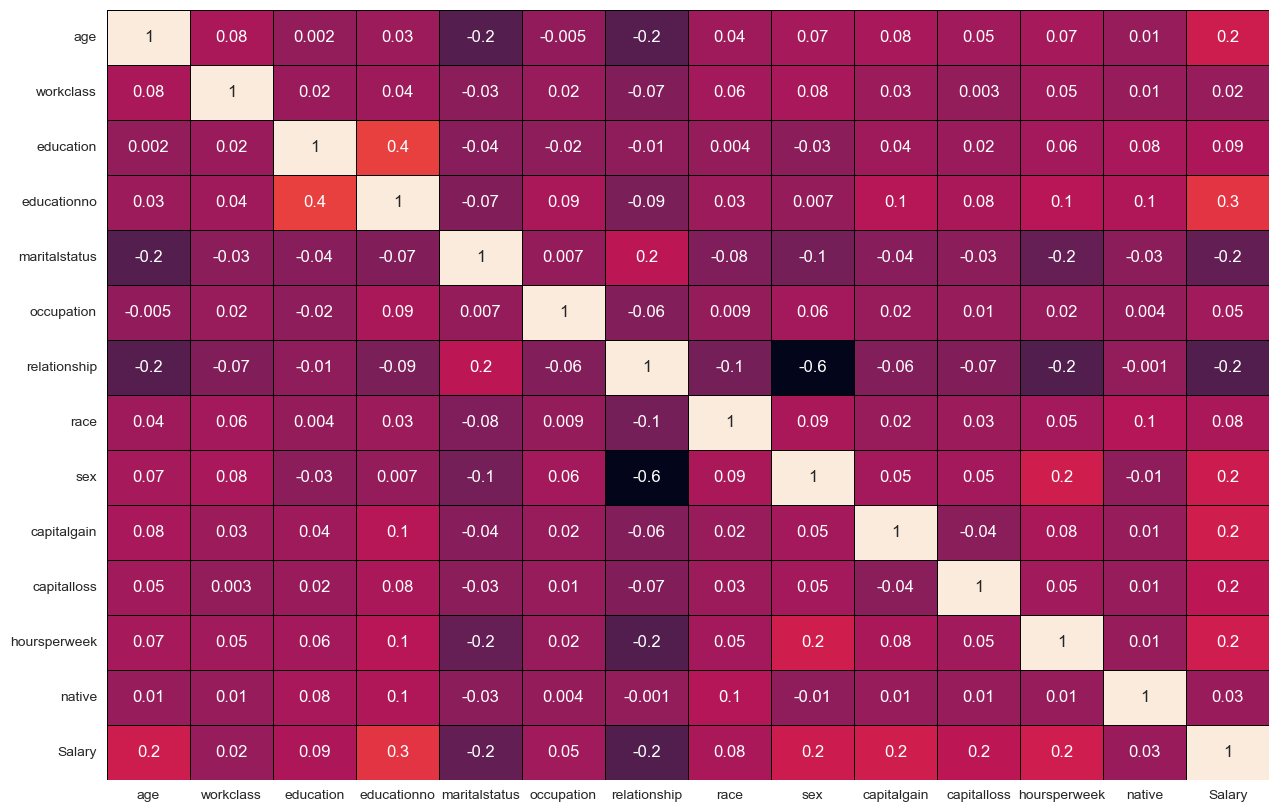

In [24]:
fig,ax = plt.subplots(figsize = (15,10))
sns.heatmap(df1.corr(),annot=True,fmt='.1g',cbar=False,linewidths='0.5',linecolor='black')

In [25]:
sns.pairplot(data=df1,hue = 'Salary')

In [26]:
labels =['>50','<=50']
colors =['green','orange']
sizes = [9975,29264]
plt.pie(sizes,labels=labels,colors=colors,startangle=90,shadow=True,
       explode= (0.1,0.1),autopct ='%1.2f%%')
plt.title('Salary Division')
plt.axis('equal')
plt.show()

In [27]:
df1.Salary.value_counts()

0    29264
1     9975
Name: Salary, dtype: int64

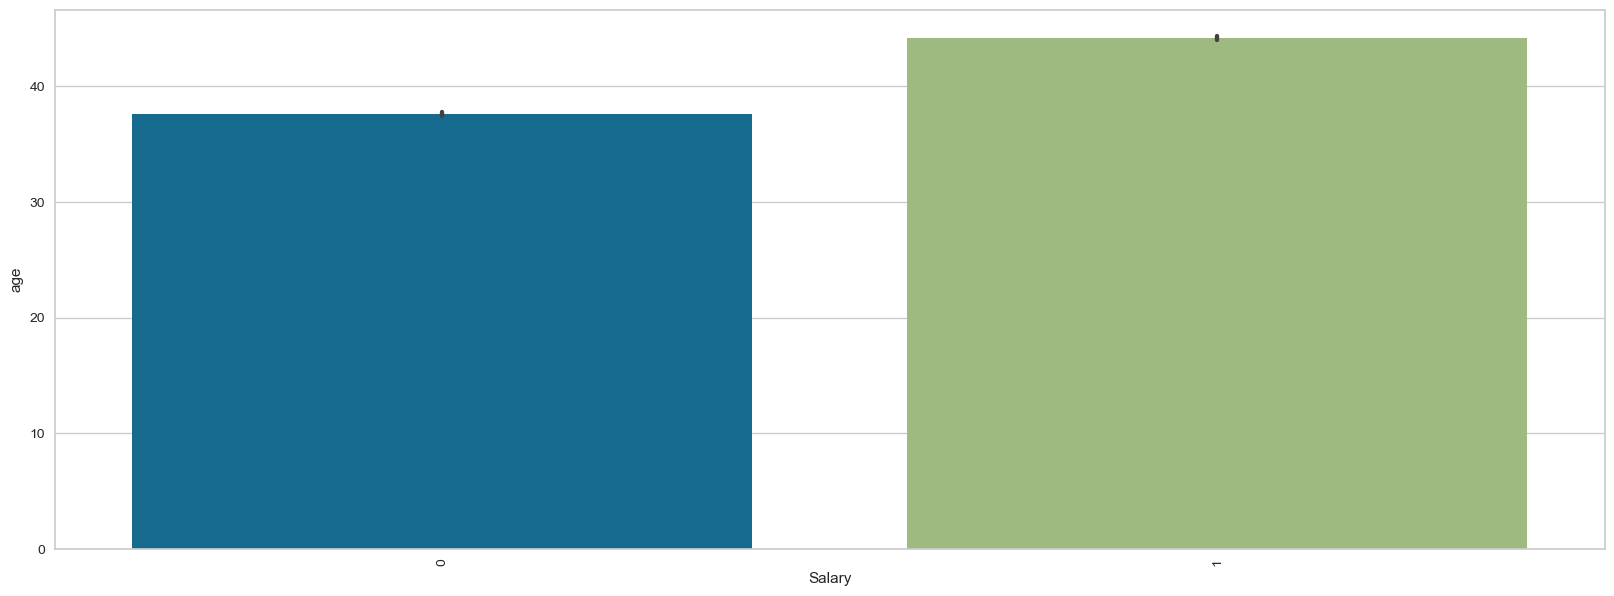

In [28]:
plt.figure(figsize=(20,7))
Age = df1[['Salary','age']].sort_values('age',ascending=False)
ax = sns.barplot(x = 'Salary',y = 'age',data = Age)
ax.set(xlabel = 'Salary',ylabel = 'age')
plt.xticks(rotation = 90)
plt.show()

In [29]:
df.education.value_counts()

 HS-grad         12003
 Some-college     8456
 Bachelors        6522
 Masters          2357
 Assoc-voc        1859
 Assoc-acdm       1470
 11th             1422
 10th             1136
 7th-8th           801
 Prof-school       764
 9th               658
 12th              540
 Doctorate         526
 5th-6th           438
 1st-4th           217
 Preschool          70
Name: education, dtype: int64

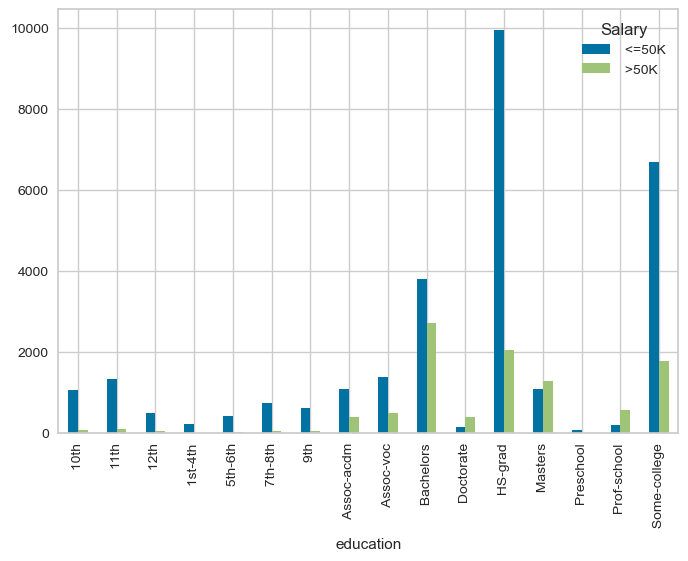

In [30]:
pd.crosstab(df.education,df.Salary).plot(kind = 'bar')
plt.show()

# Feature Engineering

In [31]:
df1.shape

(39239, 14)

In [32]:
X = df1.iloc[:,0:13]
y = df1.iloc[:,13]

In [33]:
#standardizing values 
std = StandardScaler()
df_scaled = std.fit_transform(X)
df_scaled

array([[-0.02326754,  2.74336382, -0.31240583, ..., -0.23465538,
        -0.09681487,  0.28415699],
       [ 0.80392517,  1.75342578, -0.31240583, ..., -0.23465538,
        -2.26409357,  0.28415699],
       [-0.09846688, -0.22645031,  0.2027651 , ..., -0.23465538,
        -0.09681487,  0.28415699],
       ...,
       [-0.02326754, -0.22645031, -0.31240583, ..., -0.23465538,
        -0.41789319,  0.28415699],
       [ 0.35272914, -0.22645031, -0.31240583, ..., -0.23465538,
        -0.09681487,  0.28415699],
       [-0.32406489,  0.76348773, -0.31240583, ..., -0.23465538,
         1.50857677,  0.28415699]])

In [34]:
X = df_scaled

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

# Recursive Elimination Method using SVM

In [36]:
svc_lin=SVC(kernel='linear')
svm_rfe_model=RFE(estimator=svc_lin)
svm_rfe_model_fit=svm_rfe_model.fit(X_train,y_train)

In [37]:
svm_rfe_model_fit.n_features_

6

In [38]:
svm_rfe_model_fit.ranking_

array([1, 4, 5, 1, 3, 7, 2, 6, 1, 1, 1, 1, 8])

In [39]:
svm_rfe_model_fit.support_

array([ True, False, False,  True, False, False, False, False,  True,
        True,  True,  True, False])

In [40]:
df1.head()

age  workclass  education  educationno  maritalstatus  occupation  \
0   39          5          9           13              4           0   
1   50          4          9           13              2           3   
2   38          2         11            9              0           5   
3   53          2          1            7              2           5   
4   28          2          9           13              2           9   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  \
0             1     4    1         2174            0            40      37   
1             0     4    1            0            0            13      37   
2             1     4    1            0            0            40      37   
3             0     2    1            0            0            40      37   
4             5     2    0            0            0            40       4   

   Salary  
0       0  
1       0  
2       0  
3       0  
4       0

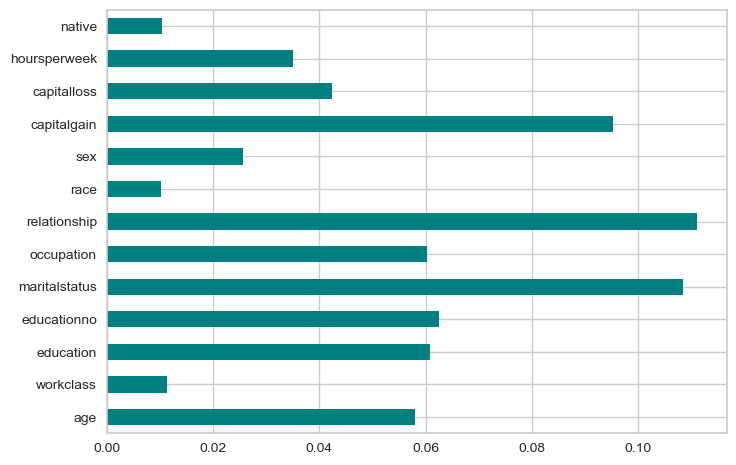

In [41]:
importances = mutual_info_classif(X,y)
feat_importances = pd.Series(importances,df1.columns[0:len(df1.columns)-1])
feat_importances.plot(kind = 'barh',color ='teal')
plt.show()

In [42]:
df2 = df1[["age","education","maritalstatus","relationship","capitalgain","occupation","Salary"]]

In [43]:
df2.head()

age  education  maritalstatus  relationship  capitalgain  occupation  \
0   39          9              4             1         2174           0   
1   50          9              2             0            0           3   
2   38         11              0             1            0           5   
3   53          1              2             0            0           5   
4   28          9              2             5            0           9   

   Salary  
0       0  
1       0  
2       0  
3       0  
4       0

In [44]:
#splitting again our data once again 
array = df2.values
X1 = array[:,0:6]
y1 = array [:,6]

In [45]:
X1,y1 = make_classification(n_samples=20000,n_features=7,n_informative=5,n_redundant=2,
                          n_repeated=0,n_classes=2,n_clusters_per_class=1,random_state=0 )

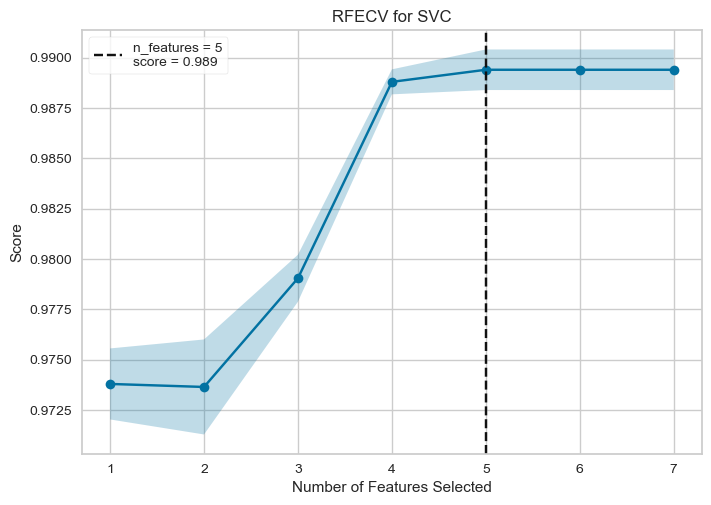

<AxesSubplot:title={'center':'RFECV for SVC'}, xlabel='Number of Features Selected', ylabel='Score'>

In [46]:
visualizer = RFECV(SVC(kernel='linear',C=1))
visualizer.fit(X1,y1,)
visualizer.show()

# Balancing the data using Smote Techniques

In [47]:
df2.head()

age  education  maritalstatus  relationship  capitalgain  occupation  \
0   39          9              4             1         2174           0   
1   50          9              2             0            0           3   
2   38         11              0             1            0           5   
3   53          1              2             0            0           5   
4   28          9              2             5            0           9   

   Salary  
0       0  
1       0  
2       0  
3       0  
4       0

<AxesSubplot:xlabel='Salary', ylabel='count'>

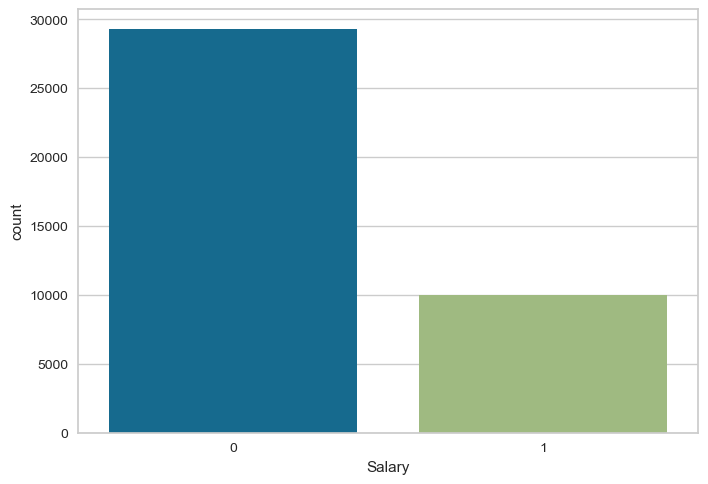

In [48]:
sns.countplot(df2['Salary'])

In [49]:
X2 = df2.iloc[:,0:6]
y2 = df2.iloc[:,6]

In [50]:
#splitting into train and test split
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.20)

In [51]:
smk = SMOTETomek(n_jobs=-1,sampling_strategy='minority')
X2_res,y2_res = smk.fit_resample(X2_train,y2_train)

In [52]:
print(X2_res.shape,y2_res.shape)

(46656, 6) (46656,)


In [53]:
print('original dataset shape {}'.format(Counter(y2)))
print('resamples dataset shape {}'.format(Counter(y2_res)))

original dataset shape Counter({0: 29264, 1: 9975})
resamples dataset shape Counter({1: 23328, 0: 23328})


# Randomized search CV

In [54]:
std = StandardScaler()
df_scaled2 = std.fit_transform(X2_res)
df_scaled2

array([[ 0.65429525,  1.28875143, -0.29277544, -0.73487044, -0.20981077,
        -1.03772297],
       [-1.01624408,  0.1696644 ,  1.18491073,  1.7352218 , -0.20981077,
        -0.03532125],
       [-0.53894713, -0.66965088, -1.77046161,  1.7352218 , -0.20981077,
         1.46828132],
       ...,
       [ 0.81339424, -0.38987912, -0.29277544, -0.73487044,  1.14741171,
        -0.78712254],
       [-0.14119967,  0.1696644 , -0.29277544, -0.73487044, -0.20981077,
         1.71888175],
       [-0.69804611,  0.1696644 , -0.29277544, -0.73487044, -0.20981077,
         1.21768089]])

In [55]:
X2_res = df_scaled2

In [56]:
X2_res_train,X2_res_test,y2_res_train,y2_res_test = train_test_split(X2_res,y2_res,test_size=0.4)

In [57]:
clf = SVC()

In [58]:
param_grid = [{'kernel':['linear','rbf'],'gamma':[0.5,0.1,0.01],'C':[10,0.1,0.001,0.0001] }]

In [59]:
rsv = RandomizedSearchCV(clf,param_grid,cv=10,verbose=100,n_jobs=1)

In [60]:
rsv.fit(X2_res_train,y2_res_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START C=10, gamma=0.1, kernel=rbf...............................
[CV 1/10; 1/10] END C=10, gamma=0.1, kernel=rbf;, score=0.805 total time=  25.2s
[CV 2/10; 1/10] START C=10, gamma=0.1, kernel=rbf...............................
[CV 2/10; 1/10] END C=10, gamma=0.1, kernel=rbf;, score=0.807 total time=  25.4s
[CV 3/10; 1/10] START C=10, gamma=0.1, kernel=rbf...............................
[CV 3/10; 1/10] END C=10, gamma=0.1, kernel=rbf;, score=0.805 total time=  25.7s
[CV 4/10; 1/10] START C=10, gamma=0.1, kernel=rbf...............................
[CV 4/10; 1/10] END C=10, gamma=0.1, kernel=rbf;, score=0.801 total time=  25.2s
[CV 5/10; 1/10] START C=10, gamma=0.1, kernel=rbf...............................
[CV 5/10; 1/10] END C=10, gamma=0.1, kernel=rbf;, score=0.798 total time=  25.0s
[CV 6/10; 1/10] START C=10, gamma=0.1, kernel=rbf...............................
[CV 6/10; 1/10] END C=10, gamma=0.1, kernel=rb

[CV 1/10; 6/10] END C=0.0001, gamma=0.1, kernel=rbf;, score=0.501 total time=  35.8s
[CV 2/10; 6/10] START C=0.0001, gamma=0.1, kernel=rbf...........................
[CV 2/10; 6/10] END C=0.0001, gamma=0.1, kernel=rbf;, score=0.501 total time=  34.9s
[CV 3/10; 6/10] START C=0.0001, gamma=0.1, kernel=rbf...........................
[CV 3/10; 6/10] END C=0.0001, gamma=0.1, kernel=rbf;, score=0.501 total time=  35.0s
[CV 4/10; 6/10] START C=0.0001, gamma=0.1, kernel=rbf...........................
[CV 4/10; 6/10] END C=0.0001, gamma=0.1, kernel=rbf;, score=0.501 total time=  35.3s
[CV 5/10; 6/10] START C=0.0001, gamma=0.1, kernel=rbf...........................
[CV 5/10; 6/10] END C=0.0001, gamma=0.1, kernel=rbf;, score=0.501 total time=  35.2s
[CV 6/10; 6/10] START C=0.0001, gamma=0.1, kernel=rbf...........................
[CV 6/10; 6/10] END C=0.0001, gamma=0.1, kernel=rbf;, score=0.501 total time=  35.2s
[CV 7/10; 6/10] START C=0.0001, gamma=0.1, kernel=rbf...........................
[CV 

RandomizedSearchCV(cv=10, estimator=SVC(), n_jobs=1,
                   param_distributions=[{'C': [10, 0.1, 0.001, 0.0001],
                                         'gamma': [0.5, 0.1, 0.01],
                                         'kernel': ['linear', 'rbf']}],
                   verbose=100)

In [61]:
rsv.best_params_,rsv.best_score_

({'kernel': 'rbf', 'gamma': 0.5, 'C': 10}, 0.8183831342826519)

# Final SVM Model

In [62]:
clf2 = SVC(kernel='rbf',C=10,gamma=0.1)
clf2.fit(X2_res_train,y2_res_train)

SVC(C=10, gamma=0.1)

In [63]:
y_pred = clf2.predict(X2_res_test)
y_pred

array([1, 1, 0, ..., 1, 1, 1])

In [64]:
print(confusion_matrix(y2_res_test,y_pred))

[[6764 2537]
 [1110 8252]]


In [65]:
print(classification_report(y2_res_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79      9301
           1       0.76      0.88      0.82      9362

    accuracy                           0.80     18663
   macro avg       0.81      0.80      0.80     18663
weighted avg       0.81      0.80      0.80     18663

